In [2]:
import os
import json
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


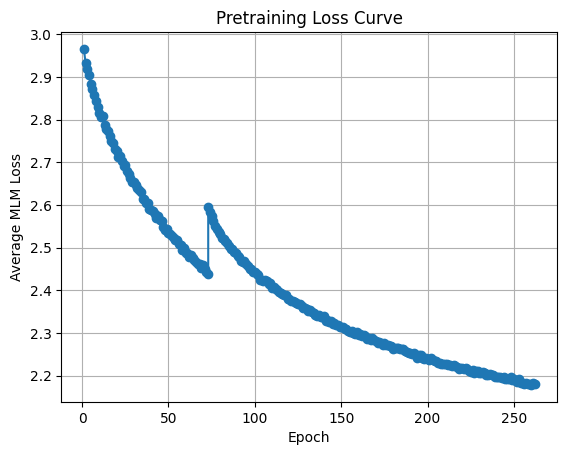

In [10]:
import re

# 로그 파일 경로
log_file_path = "jobtest.o123042"

# 결과 저장용 리스트
epochs = []
losses = []

# 정규표현식으로 loss 파싱
with open(log_file_path, "r") as f:
    for line in f:
        match = re.search(r"Epoch (\d+) 완료, 평균 MLM Loss: ([0-9.]+)", line)
        if match:
            epoch = int(match.group(1))
            loss = float(match.group(2))
            epochs.append(epoch)
            losses.append(loss)

# 그래프 그리기
plt.plot(epochs, losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Average MLM Loss")
plt.title("Pretraining Loss Curve")
plt.grid(True)
plt.show()

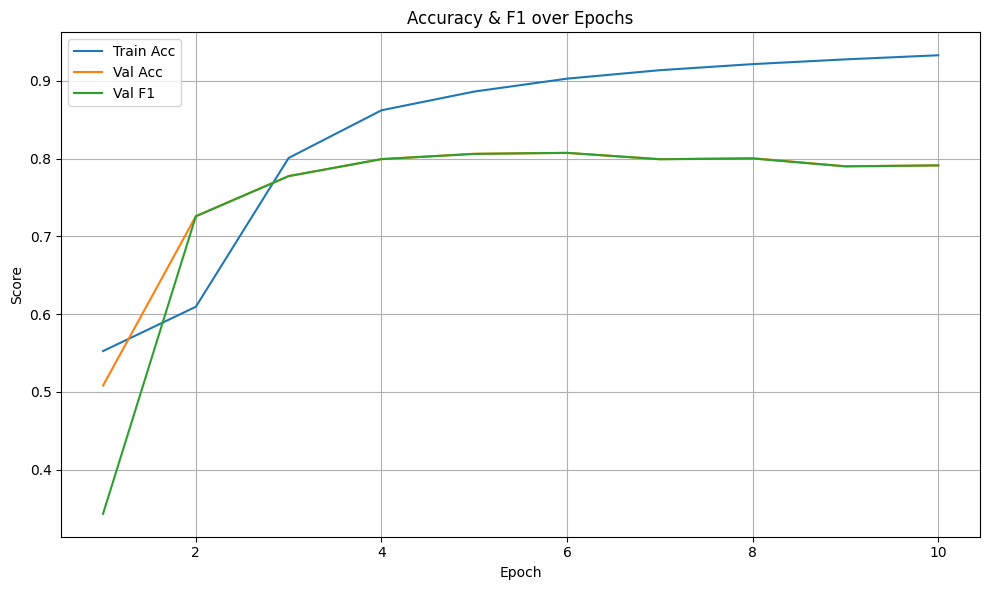

In [21]:
import re
import matplotlib.pyplot as plt

# 로그 파일 경로
log_file = "jobtest.o123157"  # ← 네 로그 파일 이름으로 바꿔줘

# 값 저장
train_acc, val_acc, val_f1, train_loss = [], [], [], []

# 정규식
train_pattern = re.compile(r"Train Loss: [\d.]+, Train Acc: ([\d.]+)")
val_pattern = re.compile(r"Val Acc: ([\d.]+), Val F1: ([\d.]+)")

# 파싱
with open(log_file, "r") as f:
    for line in f:
        train_match = train_pattern.search(line)
        val_match = val_pattern.search(line)

        if train_match:
            train_acc.append(float(train_match.group(1)))
            train_loss.append(float(train_match.group(0).split(",")[0].split(":")[1].strip()))
        if val_match:
            val_acc.append(float(val_match.group(1)))
            val_f1.append(float(val_match.group(2)))

# 에폭 수
epochs = list(range(1, len(train_acc) + 1))

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label='Train Acc')
plt.plot(epochs, val_acc, label='Val Acc')
plt.plot(epochs, val_f1, label='Val F1')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Accuracy & F1 over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


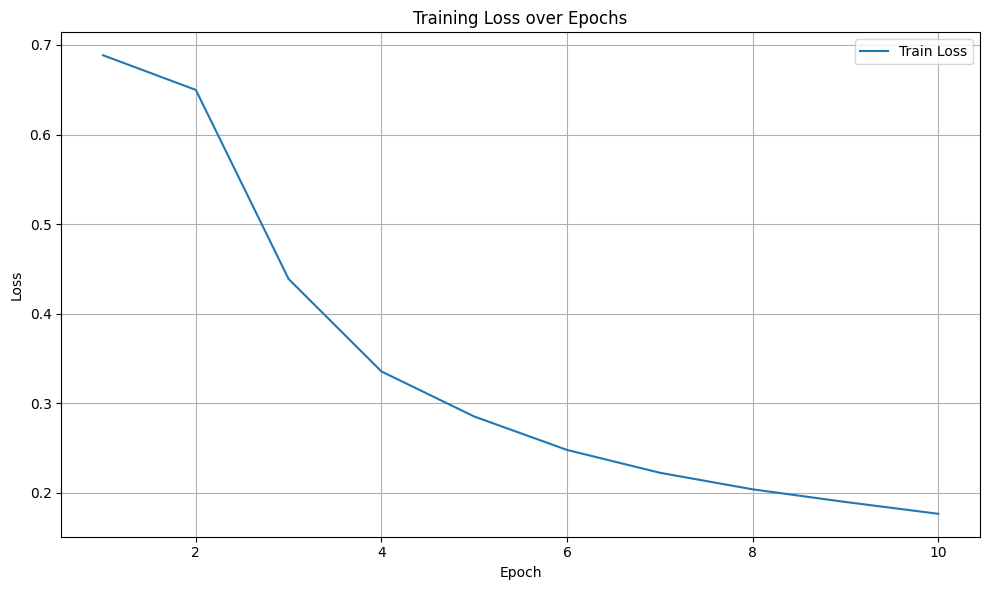

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Train Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()